In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Linear SVC
from sklearn.svm import LinearSVC
# SVM RBF
from sklearn.svm import SVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
# XGBoost Classifier
from xgboost import XGBClassifier
# CatBoost Classifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
df = pd.read_excel("customers_requirements.xlsx")

In [3]:
df.shape

(15, 30)

### Translating column names

In [4]:
from googletrans import Translator

In [5]:
translator = Translator()

# Translate each column name
translated_columns = [translator.translate(col, dest='en').text for col in df.columns]

# Create a dictionary to map original column names to translated names
translation_dict = dict(zip(df.columns, translated_columns))

# Rename columns in the DataFrame
df.rename(columns=translation_dict, inplace=True)

In [6]:
df.head()

,Submission Date,Last Update Date,Your name (FIRST NAME),Your last name (Last Name),Which aspects of the following are our help?,Please fill in your destination postcode to get better help from nearby neighbors,"Recommend local community resources for you, please select the topic you are interested in",Where did we find us?,Your WeChat name,Rental target city,...,kitchen,furniture,Parking space,Have you found an interested rental house,Please tell us your gender,Message to the neighboring assistant,Mail,IP,Submission ID,Edit Link
0,2023-02-26 00:35:27,NaT,Will,Wen,我是租客,V6X2X9,房地产Real Estate\n移民Immigration\n吃喝玩乐Entertainment,小红书,willwencom,列治文,...,可共用厨房,有家具更好，没有也可以,没有车，不需要车位,NO,男性,NaN,NaN,192.53.121.225,5532097275226500096,Edit Submission
1,2023-02-26 16:35:10,2023-03-01 17:23:15,菁芸,黄,我是租客,v6x4h5,宠物Pet\n房地产Real Estate\n就业机会Job Opportunity\n移民...,小红书,yunyunlady,本拿比\n列治文,...,必须独立厨房,需要简单家具,需要正规停车位,NO,女性,本来有宠物猫，后来说不带过来了，所以更新一下需求,NaN,43.163.206.179,5532673109717380096,Edit Submission
2,2023-02-27 10:46:03,NaT,Quinn,Song,我是租客,V6R2A1,宠物Pet\n就业机会Job Opportunity\n移民Immigration,微信,小爱,温哥华,...,无所谓,需要全套家具,没有车，不需要车位,NO,女性,谢谢,NaN,108.180.203.68,5533327628639609856,Edit Submission
3,2023-03-01 15:01:10,2023-03-01 15:15:09,echo,Yu,我是租客,V6B4N6,NaN,小红书,echo,温哥华,...,必须独立厨房,需要全套家具,没有车，不需要车位,NO,女性,DT读书学生，天车站附近的房子都行，8月要回国一趟,NaN,209.52.88.40,5535208690486970368,Edit Submission
4,2023-03-01 15:45:57,NaT,Susan,Mung,我是租客,V6P0B9,NaN,小红书,媛,温哥华,...,无所谓,有家具更好，没有也可以,没有车，不需要车位,NO,女性,NaN,NaN,210.6.142.70,5535235570727069696,Edit Submission


In [7]:
df.columns

Index(['Submission Date', 'Last Update Date', 'Your name (FIRST NAME)',
       'Your last name (Last Name)',
       'Which aspects of the following are our help?',
       'Please fill in your destination postcode to get better help from nearby neighbors',
       'Recommend local community resources for you, please select the topic you are interested in',
       'Where did we find us?', 'Your WeChat name', 'Rental target city',
       'If you need to rent a house, please explain your rental demand, so that we can match the right listing for you faster',
       'Budget price upper limit', 'Housing type', 'Choose your rental date',
       'Fill in your rental time', 'How many people are checked?',
       'Property Type', 'Basement acceptance', 'House type 2',
       'Whether there is a pet', 'kitchen', 'furniture', 'Parking space',
       'Have you found an interested rental house',
       'Please tell us your gender', 'Message to the neighboring assistant',
       'Mail', 'IP', 'Submissi

## translate data in rows

In [8]:
for index, row in df.iterrows():
    for col in df.columns:
        try:
            translation = translator.translate(str(row[col]), dest='en')
            df.at[index, col] = translation.text if hasattr(translation, 'text') else str(row[col])
        except Exception as e:
            pass

In [9]:
df['Full Name'] = df['Your name (FIRST NAME)'] + ' ' + df['Your last name (Last Name)']

In [10]:
df = df.drop(columns=["Your name (FIRST NAME)", "Your last name (Last Name)", "Last Update Date","Recommend local community resources for you, please select the topic you are interested in","Which aspects of the following are our help?", "Where did we find us?", "Edit Link", "IP", "Mail"])

In [11]:
def change_b_to_v(postcode):
    return 'V' + postcode[1:] if postcode.startswith('B') else postcode

# Apply the function to the 'Destination Postcode' column
df['Destination Postcode'] = df['Please fill in your destination postcode to get better help from nearby neighbors'].apply(change_b_to_v)

In [12]:
df = df.drop(columns=["Please fill in your destination postcode to get better help from nearby neighbors", "If you need to rent a house, please explain your rental demand, so that we can match the right listing for you faster"])

In [13]:
def update_destination_postcode(row):
    if not row['Destination Postcode'].startswith('V'):
        if 'Vancouver' in row['Rental target city']:
            return 'V6e 3Z8'
        else:
            return 'v6v 0a6'
    return row['Destination Postcode']

# Apply the function to update Destination Postcode
df['Destination Postcode'] = df.apply(update_destination_postcode, axis=1)

In [14]:
df = pd.read_csv("CustomerEnglish1.csv")

In [15]:
df.head(2)

,Submission Date,Your WeChat name,Rental target city,"If you need to rent a house, please explain your rental demand, so that we can match the right listing for you faster",Budget price upper limit,Housing type,Choose your rental date,Fill in your rental time,How many people are checked?,Property Type,...,House type 2,Whether there is a pet,kitchen,furniture,Parking space,Have you found an interested rental house,Please tell us your gender,Message to the neighboring assistant,Full Name,Destination Postcode
0,2023-02-26 00:35:27,willwencom,Richmond,"In mid -April near Lansdowne, my boy student, ...",1600,Can accept joint rental,2023-04-12,For half a year,1,"As long as the budget is consistent, any type ...",...,2 sleeping room,No pet,Can share kitchen,"It's better to have furniture, no can","No car, no parking space",NO,male,into,Will Wen,V6X2X9
1,2023-02-26 16:35:10,Unionlades,Benbi\nRichmond,One -room apartment,2500,Must be rented,2023-04-01,Long rent for 1 year,1,apartment,...,1 bedroom,No pet,Must be independent kitchen,Need simple furniture,Need a regular parking space,NO,woman,"There were pet cats, but later I didn’t bring ...",Gorgeous yellow,v6v 0a6


In [16]:
df.shape

(15, 21)

In [17]:
df.columns

Index(['Submission Date', 'Your WeChat name', 'Rental target city',
       'If you need to rent a house, please explain your rental demand, so that we can match the right listing for you faster',
       'Budget price upper limit', 'Housing type', 'Choose your rental date',
       'Fill in your rental time', 'How many people are checked?',
       'Property Type', 'Basement acceptance', 'House type 2',
       'Whether there is a pet', 'kitchen', 'furniture', 'Parking space',
       'Have you found an interested rental house',
       'Please tell us your gender', 'Message to the neighboring assistant',
       'Full Name', 'Destination Postcode'],
      dtype='object')

In [18]:
df= df.drop(columns=["If you need to rent a house, please explain your rental demand, so that we can match the right listing for you faster"])

In [19]:
df['Choose your rental date'] = pd.to_datetime(df['Choose your rental date'], format='%Y-%m-%d')

df['rental_month'] = df['Choose your rental date'].dt.month

In [20]:
df = df.drop(columns=["Choose your rental date"])

In [21]:
df["Property Type"].unique()

array(['As long as the budget is consistent, any type of house is available',
       'apartment'], dtype=object)

In [22]:
df["Basement acceptance"].unique()

array(['Acceptable underground', 'Do not accept half underground at all'],
      dtype=object)

In [23]:
df["House type 2"].unique()

array(['2 sleeping room', '1 bedroom', '2 sleeping room\n3 bedrooms',
       '3 bedrooms\n3 Below it is good', '3 bedrooms'], dtype=object)

In [24]:
df["Whether there is a pet"].unique()

array(['No pet', 'Dog'], dtype=object)

In [25]:
import pandas as pd

# Assuming df is your DataFrame
df['kitchen_preference'] = df['kitchen'].apply(lambda x: 'Independent' if 'independent' in x.lower() else 'Shared')



In [26]:
df= df.drop(columns=["kitchen"])

In [27]:
df.furniture.unique()

array(["It's better to have furniture, no can", 'Need simple furniture',
       'Need a full set of furniture'], dtype=object)

In [28]:
df['furniture_category'] = df['furniture'].apply(lambda x: 'Has Furniture' if 'no can' not in x.lower() else 'No Furniture')

In [29]:
df = df.drop(columns=["furniture"])

In [30]:
df["Parking space"].unique()

array(['No car, no parking space', 'Need a regular parking space'],
      dtype=object)

In [31]:
df.rename(columns={'Budget price upper limit': 'Rent'}, inplace=True)

In [32]:
df.rental_month

0     4
1     4
2     4
3     7
4     4
5     3
6     6
7     7
8     4
9     4
10    4
11    4
12    7
13    4
14    5
Name: rental_month, dtype: int64

In [33]:
df = df.drop(columns=["Message to the neighboring assistant"])

In [34]:
df.shape

(15, 19)

In [35]:
df.isnull().sum()

Submission Date                              0
Your WeChat name                             0
Rental target city                           0
Rent                                         0
Housing type                                 0
Fill in your rental time                     0
How many people are checked?                 0
Property Type                                0
Basement acceptance                          0
House type 2                                 0
Whether there is a pet                       0
Parking space                                0
Have you found an interested rental house    0
Please tell us your gender                   0
Full Name                                    0
Destination Postcode                         0
rental_month                                 0
kitchen_preference                           0
furniture_category                           0
dtype: int64

In [36]:
df.rename(columns={'Rental target city': 'City'}, inplace=True)

In [37]:
df.City.unique()

array(['Richmond', 'Benbi\nRichmond', 'Vancouver', 'Vancouver\nBenbi',
       'Vancouver\nRichmond\nWestern temperature'], dtype=object)

In [38]:
df.head(1)

,Submission Date,Your WeChat name,City,Rent,Housing type,Fill in your rental time,How many people are checked?,Property Type,Basement acceptance,House type 2,Whether there is a pet,Parking space,Have you found an interested rental house,Please tell us your gender,Full Name,Destination Postcode,rental_month,kitchen_preference,furniture_category
0,2023-02-26 00:35:27,willwencom,Richmond,1600,Can accept joint rental,For half a year,1,"As long as the budget is consistent, any type ...",Acceptable underground,2 sleeping room,No pet,"No car, no parking space",NO,male,Will Wen,V6X2X9,4,Shared,No Furniture


In [39]:
# Assuming your DataFrame is named df
df['City'] = df['City'].replace(r'\\n', '\n', regex=True)
df['City'] = df['City'].str.split('\n')
df = df.explode('City')

In [40]:
df['City'] = df['City'].replace({'Benbi': 'Burnaby', 'Western temperature': 'Other'})

In [41]:
df["Property Type"].replace({
    'As long as the budget is consistent, any type of house is available': 'Any',
    'apartment': 'Apartment'
}, inplace=True)

In [42]:
df["Property Type"].unique()

array(['Any', 'Apartment'], dtype=object)

In [43]:
# Create a mapping function for the 'Parking space' column
def map_parking_space_category(parking_space):
    if 'no' in parking_space.lower():
        return 'no'
    else:
        return 'yes'

# Apply the mapping function to the 'Parking space' column
df['parking'] = df['Parking space'].apply(map_parking_space_category)


In [44]:
df = df.drop(columns=["Parking space"])

In [45]:
df = df.drop(columns=["Housing type"])

In [46]:
df.columns

Index(['Submission Date', 'Your WeChat name', 'City', 'Rent',
       'Fill in your rental time', 'How many people are checked?',
       'Property Type', 'Basement acceptance', 'House type 2',
       'Whether there is a pet', 'Have you found an interested rental house',
       'Please tell us your gender', 'Full Name', 'Destination Postcode',
       'rental_month', 'kitchen_preference', 'furniture_category', 'parking'],
      dtype='object')

In [47]:
# df.to_csv("final_customer.csv", index=False)
# dfHouse.to_csv("final_housing.csv", index=False)

In [48]:
import re
df['bedroom'] = df['House type 2'].str.extract(r'(\d+)\s*(?:bedroom|sleeping room)', flags=re.IGNORECASE)

# Convert the 'bedroom_type2' column to integer
df['bedroom'] = df['bedroom'].astype(int)

In [49]:
df.bedroom.unique()

array([2, 1, 3])

In [50]:
df = df.drop(columns=["House type 2"])

In [51]:
columns_to_drop = ['Submission Date', 'Fill in your rental time', 'How many people are checked?',
                   'Basement acceptance', 'Whether there is a pet', 'Have you found an interested rental house',
                   'Please tell us your gender', 'Destination Postcode', 'kitchen_preference', 'furniture_category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [53]:
dfHouse = pd.read_csv("houses_sample.csv")

In [54]:
dfHouse.head()

,Unnamed: 0,listingUrl,listingId,listingTitle,listingCity,listingTime,listingName,listingTel,listingAdd,listingMail,...,listing_independent_access,listing_rent_date,listing_rent_price,listing_describe,listing_conditions,data_time,contact_history_status,signed_landlord,result,remark
0,18196,https://www.vansky.com/info/adfree/2363452.html,2363452,温西12街开车6分钟到ubc和3分钟罗宾中学附近house拎包入住,Vancouver,"2023-03-02, 12:56",姜阿姨,NaN,west 12 Ave,NaN,...,NaN,NaN,NaN,.，位于温西12街，这里有闻名世界的UBC大学，温西最好的公校Lord Byng Secon...,NaN,"2023-03-03, 09:25:17",No,No,NaN,NaN
1,18197,https://www.vansky.com/info/adfree/2387652.html,2387652,温哥华东区近天车站独立出入单人套房,Vancouver,"2023-03-02, 10:50",Cindy,NaN,3229 E 15th Ave Vancouver BC,NaN,...,是,2023-03-01,850.0,非常近天车站和超市，附近有中餐馆，韩国餐，越南餐馆，麦当劳，星巴克，非常方便，房间大，卫生间...,无烟，无宠,"2023-03-03, 09:25:17",No,No,NaN,NaN
2,18200,https://www.vansky.com/info/adfree/2401947.html,2401947,出租温西近UBC大学独立出入一厅一房,Vancouver,"2023-03-02, 10:46",Flora,NaN,4063 W 40th Ave vancouver,NaN,...,是,2023-04-01,1500.0,附近有超市和各种餐厅，环境幽静，近公园，房间大，独立出入。有意者电7788810408,无宠,"2023-03-03, 09:32:59",No,No,NaN,NaN
3,18201,https://www.vansky.com/info/adfree/2401946.html,2401946,温东平地一房厅,Vancouver,"2023-03-02, 10:46",王先生,NaN,E 20th Ave,NaN,...,是,2023-03-05,850.0,温东独立屋平地一房，独立门户，洗手间，简易煮食厨具！近巴士，天车站，社区中心、图书馆、泳池及...,无烟，无宠，少煮食，正职，学生,"2023-03-03, 09:32:59",No,No,NaN,NaN
4,18204,https://www.vansky.com/info/adfree/2393995.html,2393995,"温市中心1房1卫+阳光房，包家俱, 2021新装修，地点中心",Vancouver,"2023-03-02, 10:41",Ray,NaN,438 Seymour Street,rliao02@mylangara.ca,...,是,2023-04-01,2700.0,温哥华市中心，中心中的中心！1房1卫+阳光房，位于438 Seymour，18楼，无遮挡城市...,无烟，无宠,"2023-03-03, 09:32:59",No,No,NaN,NaN


In [55]:
dfHouse.isnull().sum()

Unnamed: 0                     0
listingUrl                     0
listingId                      0
listingTitle                   0
listingCity                    0
listingTime                    0
listingName                    0
listingTel                    50
listingAdd                     0
listingMail                   19
listing_house_type            15
listing_room_type              6
listing_parking               15
listing_facility              16
listing_rent_cover            23
listing_rent_type              0
listing_independent_access    34
listing_rent_date             15
listing_rent_price            10
listing_describe               3
listing_conditions            20
data_time                      0
contact_history_status         0
signed_landlord                0
result                        47
remark                        50
dtype: int64

In [56]:
# dfHouse = dfHouse.drop(columns=["result", "remark", "listingTel", "listingMail", "listingUrl"])
dfHouse.head()

,Unnamed: 0,listingUrl,listingId,listingTitle,listingCity,listingTime,listingName,listingTel,listingAdd,listingMail,...,listing_independent_access,listing_rent_date,listing_rent_price,listing_describe,listing_conditions,data_time,contact_history_status,signed_landlord,result,remark
0,18196,https://www.vansky.com/info/adfree/2363452.html,2363452,温西12街开车6分钟到ubc和3分钟罗宾中学附近house拎包入住,Vancouver,"2023-03-02, 12:56",姜阿姨,NaN,west 12 Ave,NaN,...,NaN,NaN,NaN,.，位于温西12街，这里有闻名世界的UBC大学，温西最好的公校Lord Byng Secon...,NaN,"2023-03-03, 09:25:17",No,No,NaN,NaN
1,18197,https://www.vansky.com/info/adfree/2387652.html,2387652,温哥华东区近天车站独立出入单人套房,Vancouver,"2023-03-02, 10:50",Cindy,NaN,3229 E 15th Ave Vancouver BC,NaN,...,是,2023-03-01,850.0,非常近天车站和超市，附近有中餐馆，韩国餐，越南餐馆，麦当劳，星巴克，非常方便，房间大，卫生间...,无烟，无宠,"2023-03-03, 09:25:17",No,No,NaN,NaN
2,18200,https://www.vansky.com/info/adfree/2401947.html,2401947,出租温西近UBC大学独立出入一厅一房,Vancouver,"2023-03-02, 10:46",Flora,NaN,4063 W 40th Ave vancouver,NaN,...,是,2023-04-01,1500.0,附近有超市和各种餐厅，环境幽静，近公园，房间大，独立出入。有意者电7788810408,无宠,"2023-03-03, 09:32:59",No,No,NaN,NaN
3,18201,https://www.vansky.com/info/adfree/2401946.html,2401946,温东平地一房厅,Vancouver,"2023-03-02, 10:46",王先生,NaN,E 20th Ave,NaN,...,是,2023-03-05,850.0,温东独立屋平地一房，独立门户，洗手间，简易煮食厨具！近巴士，天车站，社区中心、图书馆、泳池及...,无烟，无宠，少煮食，正职，学生,"2023-03-03, 09:32:59",No,No,NaN,NaN
4,18204,https://www.vansky.com/info/adfree/2393995.html,2393995,"温市中心1房1卫+阳光房，包家俱, 2021新装修，地点中心",Vancouver,"2023-03-02, 10:41",Ray,NaN,438 Seymour Street,rliao02@mylangara.ca,...,是,2023-04-01,2700.0,温哥华市中心，中心中的中心！1房1卫+阳光房，位于438 Seymour，18楼，无遮挡城市...,无烟，无宠,"2023-03-03, 09:32:59",No,No,NaN,NaN


In [57]:
dfHouse.head()

,Unnamed: 0,listingUrl,listingId,listingTitle,listingCity,listingTime,listingName,listingTel,listingAdd,listingMail,...,listing_independent_access,listing_rent_date,listing_rent_price,listing_describe,listing_conditions,data_time,contact_history_status,signed_landlord,result,remark
0,18196,https://www.vansky.com/info/adfree/2363452.html,2363452,温西12街开车6分钟到ubc和3分钟罗宾中学附近house拎包入住,Vancouver,"2023-03-02, 12:56",姜阿姨,NaN,west 12 Ave,NaN,...,NaN,NaN,NaN,.，位于温西12街，这里有闻名世界的UBC大学，温西最好的公校Lord Byng Secon...,NaN,"2023-03-03, 09:25:17",No,No,NaN,NaN
1,18197,https://www.vansky.com/info/adfree/2387652.html,2387652,温哥华东区近天车站独立出入单人套房,Vancouver,"2023-03-02, 10:50",Cindy,NaN,3229 E 15th Ave Vancouver BC,NaN,...,是,2023-03-01,850.0,非常近天车站和超市，附近有中餐馆，韩国餐，越南餐馆，麦当劳，星巴克，非常方便，房间大，卫生间...,无烟，无宠,"2023-03-03, 09:25:17",No,No,NaN,NaN
2,18200,https://www.vansky.com/info/adfree/2401947.html,2401947,出租温西近UBC大学独立出入一厅一房,Vancouver,"2023-03-02, 10:46",Flora,NaN,4063 W 40th Ave vancouver,NaN,...,是,2023-04-01,1500.0,附近有超市和各种餐厅，环境幽静，近公园，房间大，独立出入。有意者电7788810408,无宠,"2023-03-03, 09:32:59",No,No,NaN,NaN
3,18201,https://www.vansky.com/info/adfree/2401946.html,2401946,温东平地一房厅,Vancouver,"2023-03-02, 10:46",王先生,NaN,E 20th Ave,NaN,...,是,2023-03-05,850.0,温东独立屋平地一房，独立门户，洗手间，简易煮食厨具！近巴士，天车站，社区中心、图书馆、泳池及...,无烟，无宠，少煮食，正职，学生,"2023-03-03, 09:32:59",No,No,NaN,NaN
4,18204,https://www.vansky.com/info/adfree/2393995.html,2393995,"温市中心1房1卫+阳光房，包家俱, 2021新装修，地点中心",Vancouver,"2023-03-02, 10:41",Ray,NaN,438 Seymour Street,rliao02@mylangara.ca,...,是,2023-04-01,2700.0,温哥华市中心，中心中的中心！1房1卫+阳光房，位于438 Seymour，18楼，无遮挡城市...,无烟，无宠,"2023-03-03, 09:32:59",No,No,NaN,NaN


In [58]:
for index, row in dfHouse.iterrows():
    for col in dfHouse.columns:
        try:
            translation = translator.translate(str(row[col]), dest='en')
            dfHouse.at[index, col] = translation.text if hasattr(translation, 'text') else str(row[col])
        except Exception as e:
            pass

In [59]:
dfHouse.head()

,Unnamed: 0,listingUrl,listingId,listingTitle,listingCity,listingTime,listingName,listingTel,listingAdd,listingMail,...,listing_independent_access,listing_rent_date,listing_rent_price,listing_describe,listing_conditions,data_time,contact_history_status,signed_landlord,result,remark
0,18196,https://www.vansky.com/info/adfree/2363452.html,2363452,Drive 6 minutes in Wenxi 12th Street to UBC an...,Vancouver,"2023-03-02, 12:56",Aunt Jiang,into,west 12 Ave,into,...,into,into,into,. It is located on Wenxi 12th Street. Here is ...,into,"2023-03-03, 09:25:17",No,No,into,into
1,18197,https://www.vansky.com/info/adfree/2387652.html,2387652,Vancouver East District Near Tian Station Inde...,Vancouver,"2023-03-02, 10:50",Cindy,into,3229 E 15th Ave Vancouver BC,into,...,yes,2023-03-01,850.0,It is very near the sky station and supermarke...,"Smokeless, no pet","2023-03-03, 09:25:17",No,No,into,into
2,18200,https://www.vansky.com/info/adfree/2401947.html,2401947,Rental Winxi Near UBC University to enter and ...,Vancouver,"2023-03-02, 10:46",Flora,into,4063 W 40th Ave vancouver,into,...,yes,2023-04-01,1500.0,There are supermarkets and various restaurants...,No favor,"2023-03-03, 09:32:59",No,No,into,into
3,18201,https://www.vansky.com/info/adfree/2401946.html,2401946,Wen Dongping's one -bedroom hall,Vancouver,"2023-03-02, 10:46",Mr. Wang,into,E 20th Ave,into,...,yes,2023-03-05,850.0,"Wen Dong's independent one -bedroom room, inde...","No smoke, no pet, cooking less, full -time, st...","2023-03-03, 09:32:59",No,No,into,into
4,18204,https://www.vansky.com/info/adfree/2393995.html,2393995,"Wenshi Center 1 room, 1 guard+sunshine room, b...",Vancouver,"2023-03-02, 10:41",Ray,into,438 Seymour Street,rliao02@mylangara.ca,...,yes,2023-04-01,2700.0,"Vancouver city center, center in the center!1 ...","Smokeless, no pet","2023-03-03, 09:32:59",No,No,into,into


In [60]:
dfHouse = dfHouse.drop(columns=["Unnamed: 0", "listingTime", "listing_describe", "listingTitle"])

In [61]:
dfHouse

,listingUrl,listingId,listingCity,listingName,listingTel,listingAdd,listingMail,listing_house_type,listing_room_type,listing_parking,...,listing_rent_type,listing_independent_access,listing_rent_date,listing_rent_price,listing_conditions,data_time,contact_history_status,signed_landlord,result,remark
0,https://www.vansky.com/info/adfree/2363452.html,2363452,Vancouver,Aunt Jiang,into,west 12 Ave,into,into,into,into,...,Rental and shared rental,into,into,into,into,"2023-03-03, 09:25:17",No,No,into,into
1,https://www.vansky.com/info/adfree/2387652.html,2387652,Vancouver,Cindy,into,3229 E 15th Ave Vancouver BC,into,Independent house; room type: semi -underground,1 bedroom; 1 bathroom; 0 living room; full -fu...,Parking space,...,The entire rent,yes,2023-03-01,850.0,"Smokeless, no pet","2023-03-03, 09:25:17",No,No,into,into
2,https://www.vansky.com/info/adfree/2401947.html,2401947,Vancouver,Flora,into,4063 W 40th Ave vancouver,into,Independent house; room type: semi -underground,1 bedroom; 1 bathroom; 1 living room; full -fu...,Parking space,...,The entire rent,yes,2023-04-01,1500.0,No favor,"2023-03-03, 09:32:59",No,No,into,into
3,https://www.vansky.com/info/adfree/2401946.html,2401946,Vancouver,Mr. Wang,into,E 20th Ave,into,Independent house; room type: flat ground,1 bedroom; 1 bathroom; 0 living room; no kitch...,roadside,...,The entire rent,yes,2023-03-05,850.0,"No smoke, no pet, cooking less, full -time, st...","2023-03-03, 09:32:59",No,No,into,into
4,https://www.vansky.com/info/adfree/2393995.html,2393995,Vancouver,Ray,into,438 Seymour Street,rliao02@mylangara.ca,Apartment; Room Type: Intermediate Floor,1 bedroom; 1 bathroom; 1 living room; full -fu...,Parking space,...,The entire rent,yes,2023-04-01,2700.0,"Smokeless, no pet","2023-03-03, 09:32:59",No,No,into,into
5,https://www.vansky.com/info/adfree/2392472.html,2392472,Surrey,landlord,into,13438 central ave,into,into,into,into,...,Rental and shared rental,into,into,into,into,"2023-03-03, 09:32:59",No,No,into,into
6,https://www.vansky.com/info/adfree/2401937.html,2401937,Vancouver,Hannah,into,2507-1008 Cambie street,liuzehong95@gmail.com,apartment,2 bedrooms; 2 bathrooms; 1 living room; full -...,Parking space,...,The entire rent,into,2023-06-01,4000.0,into,"2023-03-03, 09:32:59",No,No,into,into
7,https://www.vansky.com/info/adfree/2398379.html,2398379,Richmond,Miss Xu,into,"7888 ACKROYD Road, Richmond, BC V6X 0M9 Canada",825651624@qq.com,Apartment; Room Type: Intermediate Floor,2 bedrooms; 2 bathrooms; 1 living room; full -...,Parking space,...,The entire rent,yes,2023-05-16,3500.0,"Smokeless, no pet","2023-03-03, 09:32:59",No,No,into,into
8,https://www.vansky.com/info/adfree/2235002.html,2235002,Richmond,Mr. Peng,into,4751 SHELL ROAD,pq626@hotmail.com,Apartment; room type: top floor,4 sleeping room; 0.5 bathroom; 1 living room; ...,Parking space,...,The entire rent,yes,2023-03-01,3600.0,into,"2023-03-03, 09:32:59",No,No,into,into
9,https://www.vansky.com/info/adfree/2401932.html,2401932,Richmond,helen,into,8680 boyd road,into,Independent house,5 sleeping room; 4 bathroom; 0 living room; no...,Parking space,...,The entire rent,into,2023-03-05,4500.0,"No smoke, no pet, full job","2023-03-03, 09:32:59",No,No,into,into


In [63]:
dfHouse.listingCity.unique()

array(['Vancouver', 'Surrey', 'Richmond', 'Burnaby', 'Other', 'Coquitlam',
       'White Rock', 'Port Coq.'], dtype=object)

In [64]:
dfHouse = dfHouse.rename(columns={'listingCity': 'City'})

In [65]:
dfHouse.City.unique()

array(['Vancouver', 'Surrey', 'Richmond', 'Burnaby', 'Other', 'Coquitlam',
       'White Rock', 'Port Coq.'], dtype=object)

In [66]:
dfHouse['City'].replace(['Surrey', 'Coquitlam', 'White Rock', 'Port Coq.'], 'Other', inplace=True)

In [69]:
dfHouse["listing_house_type"].unique()

array(['into', 'Independent house; room type: semi -underground',
       'Independent house; room type: flat ground',
       'Apartment; Room Type: Intermediate Floor', 'apartment',
       'Apartment; room type: top floor', 'Independent house',
       'Independent house; room type: upstairs',
       'Apartment; room type: 1st floor',
       'Company row; room type: flat ground', '公寓；房间类型：中间楼层'],
      dtype=object)

In [70]:
dfHouse.listing_house_type.unique()

array(['into', 'Independent house; room type: semi -underground',
       'Independent house; room type: flat ground',
       'Apartment; Room Type: Intermediate Floor', 'apartment',
       'Apartment; room type: top floor', 'Independent house',
       'Independent house; room type: upstairs',
       'Apartment; room type: 1st floor',
       'Company row; room type: flat ground', '公寓；房间类型：中间楼层'],
      dtype=object)

In [71]:
dfHouse["listing_house_type"].unique()

array(['into', 'Independent house; room type: semi -underground',
       'Independent house; room type: flat ground',
       'Apartment; Room Type: Intermediate Floor', 'apartment',
       'Apartment; room type: top floor', 'Independent house',
       'Independent house; room type: upstairs',
       'Apartment; room type: 1st floor',
       'Company row; room type: flat ground', '公寓；房间类型：中间楼层'],
      dtype=object)

In [72]:
dfHouse["listing_house_type"].replace(
    to_replace={
        'Independent house; room type: semi -underground': 'Any',
        'Independent house; room type: flat ground': 'Any',
        'Apartment; Room Type: Intermediate Floor': 'Apartment',
        'apartment': 'Apartment',
        'Apartment; room type: top floor': 'Apartment',
        'Independent house': 'Any',
        'Independent house; room type: upstairs': 'Any',
        'Apartment; room type: 1st floor': 'Apartment',
        '公寓；房间类型：中间楼层': 'Apartment',
        '独立屋；房间类型：平地': 'Any',
        'Company row; room type: flat ground': 'Any',
        '公寓': 'Apartment',
        '0':'Any'
    },
    inplace=True
)

In [73]:
dfHouse.rename(columns={'listing_house_type': 'Property Type'}, inplace=True)

In [74]:
dfHouse.columns

Index(['listingUrl', 'listingId', 'City', 'listingName', 'listingTel',
       'listingAdd', 'listingMail', 'Property Type', 'listing_room_type',
       'listing_parking', 'listing_facility', 'listing_rent_cover',
       'listing_rent_type', 'listing_independent_access', 'listing_rent_date',
       'listing_rent_price', 'listing_conditions', 'data_time',
       'contact_history_status', 'signed_landlord', 'result', 'remark'],
      dtype='object')

In [75]:
dfHouse.listing_rent_price.unique()

array(['into', '850.0', '1500.0', '2700.0', '4000.0', '3500.0', '3600.0',
       '4500.0', '680.0', '1400.0', '2900.0', '2200.0', '1800.0',
       '4200.0', '3000.0', '2800.0', '1200.0', '2100.0', '1900.0',
       '4350.0', '2000.0', '2600.0', '3050.0', '5000.0', '2500.0',
       '2850.0', '2895.0', '1600.0', '1100.0', '4180.0', '1950.0',
       '2400.0', '3850.0', '2280.0', '6000.0'], dtype=object)

In [76]:


dfHouse.rename(columns={'listing_rent_price': 'Rent'}, inplace=True)

In [77]:
dfHouse.columns

Index(['listingUrl', 'listingId', 'City', 'listingName', 'listingTel',
       'listingAdd', 'listingMail', 'Property Type', 'listing_room_type',
       'listing_parking', 'listing_facility', 'listing_rent_cover',
       'listing_rent_type', 'listing_independent_access', 'listing_rent_date',
       'Rent', 'listing_conditions', 'data_time', 'contact_history_status',
       'signed_landlord', 'result', 'remark'],
      dtype='object')

In [78]:
dfHouse.listing_rent_date.unique()

array(['into', '2023-03-01', '2023-04-01', '2023-03-05', '2023-06-01',
       '2023-05-16', '2023-02-16', '2023-06-28', '2023-02-28',
       '2023-05-01', '2023-02-15', '2023-02-25', '2022-11-15',
       '2023-05-05', '2023-03-02', '2023-03-15', '2023-07-01'],
      dtype=object)

In [81]:
dfHouse['listing_rent_date'] = dfHouse['listing_rent_date'].replace('into', 0)

In [82]:
dfHouse = dfHouse[dfHouse["listing_rent_date"] != '0']

In [83]:
dfHouse["listing_rent_date"] = pd.to_datetime(dfHouse["listing_rent_date"])

In [84]:
dfHouse["rental_month"] = dfHouse["listing_rent_date"].dt.month

In [85]:
dfHouse = dfHouse.drop(columns=["listing_rent_date"])

In [86]:
dfHouse.listing_parking.unique()

array(['into', 'Parking space', 'roadside', 'Alley', 'garage', 'none',
       nan], dtype=object)

In [88]:
dfHouse.listing_parkinga   = dfHouse.listing_parking.fillna(0)

C:\Users\Rajat\AppData\Local\Temp\ipykernel_9768\3488342552.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfHouse.listing_parkinga   = dfHouse.listing_parking.fillna(0)


In [90]:
dfHouse.listing_parking

0              into
1     Parking space
2     Parking space
3          roadside
4     Parking space
5              into
6     Parking space
7     Parking space
8     Parking space
9     Parking space
10         roadside
11            Alley
12    Parking space
13           garage
14           garage
15           garage
16    Parking space
17    Parking space
18         roadside
19         roadside
20             into
21             into
22         roadside
23             into
24             into
25           garage
26             into
27             into
28    Parking space
29             into
30           garage
31    Parking space
32             into
33             none
34             into
35         roadside
36    Parking space
37             into
38    Parking space
39         roadside
40    Parking space
41             into
42           garage
43    Parking space
44              NaN
45         roadside
46    Parking space
47             into
48    Parking space
49             none


In [92]:
def map_parking_category(parking_type):
    if pd.isna(parking_type):
        return 'no'  # Assuming 'no' for NaN values, you can adjust accordingly
    elif parking_type.lower() in ['parking space', 'garage']:
        return 'yes'
    else:
        return 'no'

# Apply the mapping function to the 'listing_parking' column
dfHouse['parking'] = dfHouse['listing_parking'].apply(map_parking_category)


In [93]:
dfHouse = dfHouse.drop(columns=["listing_parking"])

In [94]:
dfHouse.columns

Index(['listingUrl', 'listingId', 'City', 'listingName', 'listingTel',
       'listingAdd', 'listingMail', 'Property Type', 'listing_room_type',
       'listing_facility', 'listing_rent_cover', 'listing_rent_type',
       'listing_independent_access', 'Rent', 'listing_conditions', 'data_time',
       'contact_history_status', 'signed_landlord', 'result', 'remark',
       'rental_month', 'parking'],
      dtype='object')

In [95]:
dfHouse.listing_room_type.unique()

array(['into',
       '1 bedroom; 1 bathroom; 0 living room; full -function kitchen; 0 dining room',
       '1 bedroom; 1 bathroom; 1 living room; full -function kitchen; 0 dining room',
       '1 bedroom; 1 bathroom; 0 living room; no kitchen; 0 dining room',
       '1 bedroom; 1 bathroom; 1 living room; full -function kitchen; 1 dining room',
       '2 bedrooms; 2 bathrooms; 1 living room; full -function kitchen; 1 dining room',
       '4 sleeping room; 0.5 bathroom; 1 living room; no kitchen; 1 dining room',
       '5 sleeping room; 4 bathroom; 0 living room; no kitchen; 0 dining room',
       '1 bedroom; 0.5 bathroom; 0 living room; simple kitchen; 0 dining room',
       '1 bedroom; 1 bathroom; 0 living room; full -function kitchen; 1 dining room',
       '1 bedroom; 1 bathroom; 0 living room; simple kitchen; 1 dining room',
       '2 sleeping room', '1 bedroom',
       '2 bedrooms; 1 bathroom; 1 living room; simple kitchen; 0 dining room',
       '5 sleeping room; 2.5 bathroom; 2 

In [98]:
import re


dfHouse['listing_room_type'] = dfHouse['listing_room_type'].fillna(0)
dfHouse['bedroom'] = dfHouse['listing_room_type'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)



In [99]:
dfHouse = dfHouse.drop(columns=["listing_room_type"])

In [100]:
dfHouse.columns

Index(['listingUrl', 'listingId', 'City', 'listingName', 'listingTel',
       'listingAdd', 'listingMail', 'Property Type', 'listing_facility',
       'listing_rent_cover', 'listing_rent_type', 'listing_independent_access',
       'Rent', 'listing_conditions', 'data_time', 'contact_history_status',
       'signed_landlord', 'result', 'remark', 'rental_month', 'parking',
       'bedroom'],
      dtype='object')

In [102]:
columns_to_drop = ['listingAdd', 'listing_facility', 'listing_rent_cover', 'listing_rent_type',
                   'listing_independent_access', 'listing_conditions', 'data_time', 'contact_history_status',
                   'signed_landlord']

# Drop the specified columns
dfHouse = dfHouse.drop(columns=columns_to_drop)

### perpared both datasets and translating them into english

In [104]:
#####################################################################

In [105]:
import pandas as pd

df = pd.read_csv("superfinalcustomer.csv")

dfHouse = pd.read_csv("superfinalhouse.csv")

In [106]:
dfHouse.head()

,City,listingName,Property Type,Rent,rental_month,parking,bedroom
0,Vancouver,Cindy,Any,850.0,3,yes,1
1,Vancouver,Flora,Any,1500.0,4,yes,1
2,Vancouver,Mr. Wang,Any,850.0,3,no,1
3,Vancouver,Ray,Apartment,2700.0,4,yes,1
4,Vancouver,Hannah,Apartment,4000.0,6,yes,2


In [107]:
df.head()

,Your WeChat name,City,Rent,Property Type,Full Name,rental_month,parking,bedroom
0,willwencom,Richmond,1600,Any,Will Wen,4,no,2
1,Unionlades,Burnaby,2400,Apartment,Gorgeous yellow,4,yes,1
2,Unionlades,Richmond,2400,Apartment,Gorgeous yellow,4,yes,1
3,Little Love,Vancouver,2900,Any,Quinn Song,4,no,2
4,echo,Vancouver,1600,Any,echo Yu,7,no,1


In [108]:
common_columns = ["rental_month", "City"]

# Merge the DataFrames
merged_df = pd.merge(dfHouse, df, on=common_columns, how="inner")

In [109]:
merged_df.head(10)

,City,listingName,Property Type_x,Rent_x,rental_month,parking_x,bedroom_x,Your WeChat name,Rent_y,Property Type_y,Full Name,parking_y,bedroom_y
0,Vancouver,Flora,Any,1500.0,4,yes,1,Little Love,2900,Any,Quinn Song,no,2
1,Vancouver,Flora,Any,1500.0,4,yes,1,Gangster,850,Any,Susan Mung,no,1
2,Vancouver,Flora,Any,1500.0,4,yes,1,Black 1234566,1400,Any,Blake Shen,no,1
3,Vancouver,Flora,Any,1500.0,4,yes,1,Little monster,2900,Any,Ran Z,no,2
4,Vancouver,Flora,Any,1500.0,4,yes,1,applicant,1400,Any,Q IU Yan,no,3
5,Vancouver,Flora,Any,1500.0,4,yes,1,The imprisonment of 196,4500,Any,Jenny Chai,yes,2
6,Vancouver,Ray,Apartment,2700.0,4,yes,1,Little Love,2900,Any,Quinn Song,no,2
7,Vancouver,Ray,Apartment,2700.0,4,yes,1,Gangster,850,Any,Susan Mung,no,1
8,Vancouver,Ray,Apartment,2700.0,4,yes,1,Black 1234566,1400,Any,Blake Shen,no,1
9,Vancouver,Ray,Apartment,2700.0,4,yes,1,Little monster,2900,Any,Ran Z,no,2


In [110]:
merged_df.shape

(44, 13)

In [111]:
merged_df['information'] = 'unmatch'
condition = (merged_df['Rent_x'] <= merged_df['Rent_y'])

merged_df.loc[condition, 'information'] = 'match'

In [112]:
merged_df.information.value_counts()

unmatch    27
match      17
Name: information, dtype: int64

In [113]:
merged_df.head()

,City,listingName,Property Type_x,Rent_x,rental_month,parking_x,bedroom_x,Your WeChat name,Rent_y,Property Type_y,Full Name,parking_y,bedroom_y,information
0,Vancouver,Flora,Any,1500.0,4,yes,1,Little Love,2900,Any,Quinn Song,no,2,match
1,Vancouver,Flora,Any,1500.0,4,yes,1,Gangster,850,Any,Susan Mung,no,1,unmatch
2,Vancouver,Flora,Any,1500.0,4,yes,1,Black 1234566,1400,Any,Blake Shen,no,1,unmatch
3,Vancouver,Flora,Any,1500.0,4,yes,1,Little monster,2900,Any,Ran Z,no,2,match
4,Vancouver,Flora,Any,1500.0,4,yes,1,applicant,1400,Any,Q IU Yan,no,3,unmatch


In [114]:
merged_df = merged_df.drop(columns=["listingName","Full Name", "Your WeChat name"])

In [115]:
merged_df.duplicated().sum()

5

In [116]:
merged_df.drop_duplicates(inplace=True)

In [117]:
merged_df.head()

,City,Property Type_x,Rent_x,rental_month,parking_x,bedroom_x,Rent_y,Property Type_y,parking_y,bedroom_y,information
0,Vancouver,Any,1500.0,4,yes,1,2900,Any,no,2,match
1,Vancouver,Any,1500.0,4,yes,1,850,Any,no,1,unmatch
2,Vancouver,Any,1500.0,4,yes,1,1400,Any,no,1,unmatch
4,Vancouver,Any,1500.0,4,yes,1,1400,Any,no,3,unmatch
5,Vancouver,Any,1500.0,4,yes,1,4500,Any,yes,2,match


In [118]:
df1 = pd.get_dummies(merged_df, drop_first=True)
df1.shape

(39, 13)

In [119]:
df1

,Rent_x,rental_month,bedroom_x,Rent_y,bedroom_y,City_Other,City_Richmond,City_Vancouver,Property Type_x_Apartment,parking_x_yes,Property Type_y_Apartment,parking_y_yes,information_unmatch
0,1500.0,4,1,2900,2,0,0,1,0,1,0,0,0
1,1500.0,4,1,850,1,0,0,1,0,1,0,0,1
2,1500.0,4,1,1400,1,0,0,1,0,1,0,0,1
4,1500.0,4,1,1400,3,0,0,1,0,1,0,0,1
5,1500.0,4,1,4500,2,0,0,1,0,1,0,1,0
6,2700.0,4,1,2900,2,0,0,1,1,1,0,0,0
7,2700.0,4,1,850,1,0,0,1,1,1,0,0,1
8,2700.0,4,1,1400,1,0,0,1,1,1,0,0,1
10,2700.0,4,1,1400,3,0,0,1,1,1,0,0,1
11,2700.0,4,1,4500,2,0,0,1,1,1,0,1,0


### 0 for match 1 for unmatch

In [120]:
features = df1.drop(columns=["information_unmatch"])
target = df1["information_unmatch"]

In [121]:
features

,Rent_x,rental_month,bedroom_x,Rent_y,bedroom_y,City_Other,City_Richmond,City_Vancouver,Property Type_x_Apartment,parking_x_yes,Property Type_y_Apartment,parking_y_yes
0,1500.0,4,1,2900,2,0,0,1,0,1,0,0
1,1500.0,4,1,850,1,0,0,1,0,1,0,0
2,1500.0,4,1,1400,1,0,0,1,0,1,0,0
4,1500.0,4,1,1400,3,0,0,1,0,1,0,0
5,1500.0,4,1,4500,2,0,0,1,0,1,0,1
6,2700.0,4,1,2900,2,0,0,1,1,1,0,0
7,2700.0,4,1,850,1,0,0,1,1,1,0,0
8,2700.0,4,1,1400,1,0,0,1,1,1,0,0
10,2700.0,4,1,1400,3,0,0,1,1,1,0,0
11,2700.0,4,1,4500,2,0,0,1,1,1,0,1


## Perform train test splitting

In [122]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [123]:
classifiers = [
    
    LogisticRegression(),
    KNeighborsClassifier(2),
    LinearSVC(),
    SVC(kernel="poly", C=10),
    DecisionTreeClassifier(max_depth=6),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(), 
    CatBoostClassifier(),
    MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.1,
                    max_iter=2000, random_state=42)
    
      
]

In [124]:
names = ["logistic Regression", "KNN", "Linear SVC", "SVC with Best parameters","Decision Tree", "Naive Bayes", "Random Forest", "Ada", "XGB", "CAT", "MLP"]

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
scores = []

In [126]:
for clf in classifiers:
    pipe = Pipeline([
        ("Standard Scaler", StandardScaler()),
        ("VarianceThreshold", VarianceThreshold(threshold=0.01)),
        ("classifiers", clf)

    ])   
    

    pipe.fit(X_train, y_train)
    
    print(clf)
    scores.append(pipe.score(X_test, y_test))


LogisticRegression()
KNeighborsClassifier(n_neighbors=2)
LinearSVC()
SVC(C=10, kernel='poly')
DecisionTreeClassifier(max_depth=6)
GaussianNB()
RandomForestClassifier()
AdaBoostClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Learning rate set to 0.002272
0:	learn: 0.6910302	total: 18

232:	learn: 0.3482772	total: 563ms	remaining: 1.85s
233:	learn: 0.3471452	total: 565ms	remaining: 1.85s
234:	learn: 0.3462465	total: 566ms	remaining: 1.84s
235:	learn: 0.3452938	total: 568ms	remaining: 1.84s
236:	learn: 0.3445831	total: 569ms	remaining: 1.83s
237:	learn: 0.3434924	total: 571ms	remaining: 1.83s
238:	learn: 0.3423145	total: 572ms	remaining: 1.82s
239:	learn: 0.3411666	total: 573ms	remaining: 1.81s
240:	learn: 0.3403129	total: 574ms	remaining: 1.81s
241:	learn: 0.3395586	total: 576ms	remaining: 1.8s
242:	learn: 0.3386420	total: 577ms	remaining: 1.8s
243:	learn: 0.3379097	total: 579ms	remaining: 1.79s
244:	learn: 0.3371615	total: 581ms	remaining: 1.79s
245:	learn: 0.3360458	total: 582ms	remaining: 1.78s
246:	learn: 0.3352128	total: 583ms	remaining: 1.78s
247:	learn: 0.3345013	total: 585ms	remaining: 1.77s
248:	learn: 0.3335551	total: 586ms	remaining: 1.77s
249:	learn: 0.3326869	total: 587ms	remaining: 1.76s
250:	learn: 0.3317386	total: 589ms	remaining: 1.76s
251:	learn: 0.

489:	learn: 0.1956418	total: 940ms	remaining: 979ms
490:	learn: 0.1952201	total: 943ms	remaining: 977ms
491:	learn: 0.1948354	total: 945ms	remaining: 975ms
492:	learn: 0.1944714	total: 946ms	remaining: 973ms
493:	learn: 0.1940755	total: 947ms	remaining: 970ms
494:	learn: 0.1936484	total: 948ms	remaining: 968ms
495:	learn: 0.1932908	total: 950ms	remaining: 965ms
496:	learn: 0.1927664	total: 951ms	remaining: 963ms
497:	learn: 0.1923178	total: 953ms	remaining: 960ms
498:	learn: 0.1918693	total: 954ms	remaining: 958ms
499:	learn: 0.1915976	total: 956ms	remaining: 956ms
500:	learn: 0.1912644	total: 958ms	remaining: 954ms
501:	learn: 0.1909611	total: 959ms	remaining: 951ms
502:	learn: 0.1907024	total: 961ms	remaining: 949ms
503:	learn: 0.1904567	total: 962ms	remaining: 947ms
504:	learn: 0.1900327	total: 964ms	remaining: 945ms
505:	learn: 0.1897143	total: 965ms	remaining: 943ms
506:	learn: 0.1893333	total: 967ms	remaining: 940ms
507:	learn: 0.1889833	total: 969ms	remaining: 938ms
508:	learn: 

737:	learn: 0.1253550	total: 1.32s	remaining: 467ms
738:	learn: 0.1251609	total: 1.32s	remaining: 466ms
739:	learn: 0.1249714	total: 1.32s	remaining: 464ms
740:	learn: 0.1248551	total: 1.32s	remaining: 462ms
741:	learn: 0.1247376	total: 1.32s	remaining: 460ms
742:	learn: 0.1244649	total: 1.32s	remaining: 458ms
743:	learn: 0.1243111	total: 1.32s	remaining: 456ms
744:	learn: 0.1240868	total: 1.33s	remaining: 454ms
745:	learn: 0.1238840	total: 1.33s	remaining: 452ms
746:	learn: 0.1236066	total: 1.33s	remaining: 450ms
747:	learn: 0.1234540	total: 1.33s	remaining: 449ms
748:	learn: 0.1233065	total: 1.33s	remaining: 447ms
749:	learn: 0.1230934	total: 1.33s	remaining: 445ms
750:	learn: 0.1229504	total: 1.34s	remaining: 443ms
751:	learn: 0.1227853	total: 1.34s	remaining: 441ms
752:	learn: 0.1226308	total: 1.34s	remaining: 440ms
753:	learn: 0.1223545	total: 1.34s	remaining: 438ms
754:	learn: 0.1221783	total: 1.34s	remaining: 436ms
755:	learn: 0.1219840	total: 1.34s	remaining: 434ms
756:	learn: 

983:	learn: 0.0884758	total: 1.69s	remaining: 27.5ms
984:	learn: 0.0883633	total: 1.69s	remaining: 25.8ms
985:	learn: 0.0881951	total: 1.69s	remaining: 24.1ms
986:	learn: 0.0880402	total: 1.7s	remaining: 22.3ms
987:	learn: 0.0879269	total: 1.7s	remaining: 20.6ms
988:	learn: 0.0877896	total: 1.7s	remaining: 18.9ms
989:	learn: 0.0877383	total: 1.7s	remaining: 17.2ms
990:	learn: 0.0876384	total: 1.7s	remaining: 15.5ms
991:	learn: 0.0874862	total: 1.7s	remaining: 13.7ms
992:	learn: 0.0873919	total: 1.7s	remaining: 12ms
993:	learn: 0.0871827	total: 1.71s	remaining: 10.3ms
994:	learn: 0.0870984	total: 1.71s	remaining: 8.58ms
995:	learn: 0.0870016	total: 1.71s	remaining: 6.86ms
996:	learn: 0.0868141	total: 1.71s	remaining: 5.14ms
997:	learn: 0.0866744	total: 1.71s	remaining: 3.43ms
998:	learn: 0.0865806	total: 1.71s	remaining: 1.71ms
999:	learn: 0.0864833	total: 1.71s	remaining: 0us
MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.1, max_iter=2000,
              random_state=42)


In [127]:
dfResult = pd.DataFrame(zip(names, scores), columns=["Model Names", "Scores"])
dfResult

,Model Names,Scores
0,logistic Regression,0.9
1,KNN,0.8
2,Linear SVC,0.9
3,SVC with Best parameters,0.9
4,Decision Tree,0.8
5,Naive Bayes,0.4
6,Random Forest,0.9
7,Ada,0.8
8,XGB,0.9
9,CAT,0.8


In [128]:
dfResult.sort_values(by=["Scores"], ascending=False)

,Model Names,Scores
0,logistic Regression,0.9
2,Linear SVC,0.9
3,SVC with Best parameters,0.9
6,Random Forest,0.9
8,XGB,0.9
10,MLP,0.9
1,KNN,0.8
4,Decision Tree,0.8
7,Ada,0.8
9,CAT,0.8


In [129]:
pipe = Pipeline([
        ("Standard Scaler", StandardScaler()),
        ("VarianceThreshold", VarianceThreshold(threshold=0.01)),
        ("classifiers", LogisticRegression())
    ])  

pipe.fit(X_train, y_train)
ypred = pipe.predict(X_test)
y_probs = pipe.predict_proba(X_test)[:, 1] 

In [130]:
ypred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=uint8)

### COnfusion matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

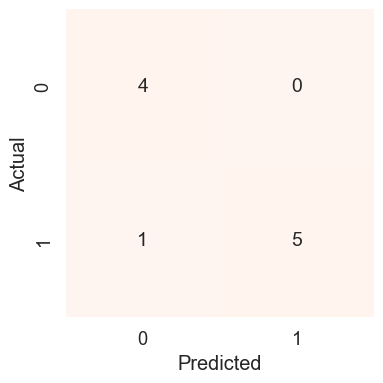

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size

## Recomending Customer owner

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame with customer information and dfHouse is the DataFrame with housing information

# Selecting relevant features for customers
X_customer = df[['City', 'Rent', 'Property Type', 'rental_month', 'parking', 'bedroom']]
y_customer = df['Your WeChat name']

# Selecting relevant features for housing
X_housing = dfHouse[['City', 'Rent', 'Property Type', 'rental_month', 'parking', 'bedroom']]
y_housing = dfHouse['listingName']

# Convert categorical variables into numerical representations using one-hot encoding
X_customer_encoded = pd.get_dummies(X_customer, columns=['City', 'Property Type', 'parking'])
X_housing_encoded = pd.get_dummies(X_housing, columns=['City', 'Property Type', 'parking'])

# Combine numerical features into a text feature
X_customer['combined_features'] = X_customer_encoded.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
X_housing['combined_features'] = X_housing_encoded.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)




C:\Users\Rajat\AppData\Local\Temp\ipykernel_9768\2545003445.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_customer['combined_features'] = X_customer_encoded.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [133]:
# Using TfidfVectorizer to convert text features into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

X_customer_tfidf = tfidf_vectorizer.fit_transform(X_customer['combined_features'])
X_housing_tfidf = tfidf_vectorizer.transform(X_housing['combined_features'])

# Training a Random Forest Classifier for housing
model_housing_based = RandomForestClassifier()
model_housing_based.fit(X_housing_tfidf, y_housing)

# Making predictions for each customer
customer_predictions = model_housing_based.predict(X_customer_tfidf)

# Create a new DataFrame to store the matched results
matched_df = pd.DataFrame({'Customer': y_customer, 'Matched_Housing': customer_predictions})

# Display the matched results
print(matched_df)

                   Customer Matched_Housing
0                willwencom            Ding
1                Unionlades            Lily
2                Unionlades            Lily
3               Little Love              Me
4                      echo            Ding
5                  Gangster        Mr. Wang
6                  mabeldxl              Me
7                   Si gray             Ray
8                      FAYE         Miss Xu
9             Black 1234566            hong
10            Black 1234566            hong
11           Little monster              Me
12                applicant            hong
13                applicant            hong
14                applicant            hong
15  The imprisonment of 196           helen
16                    grace        Chen Tai
17               willwencom            Ding
18             Tararian1126           Cheng


In [ ]:
predictions_customer

In [ ]:
df.to_csv("CustomerEnglish1.csv", index=False)

In [ ]:
df2 = pd.read_excel("Landlord Information Form .xlsx", sheet_name="Landlord Information Form V3")



In [ ]:
df2.shape

In [ ]:
translator = Translator()

# Translate each column name
translated_columns = [translator.translate(col, dest='en').text for col in df2.columns]

# Create a dictionary to map original column names to translated names
translation_dict = dict(zip(df2.columns, translated_columns))

# Rename columns in the DataFrame
df2.rename(columns=translation_dict, inplace=True)

In [ ]:
for index, row in df2.iterrows():
    for col in df.columns:
        try:
            translation = translator.translate(str(row[col]), dest='en')
            df2.at[index, col] = translation.text if hasattr(translation, 'text') else str(row[col])
        except Exception as e:
            pass

In [ ]:
df2.head()

In [ ]:
df2.shape